In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [115]:
data = pd.read_csv("C:/Users/KIIT/Downloads/pet adoption challenge/Dataset/train.csv")

In [87]:
data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [88]:
data['issue_date'] = pd.to_datetime(data['issue_date'])

data['listing_date'] = pd.to_datetime(data['listing_date'])

data['issue_month'] = data['issue_date'].dt.month
data['issue_year'] = data['issue_date'].dt.year
data['listing_month'] = data['listing_date'].dt.month
data['listing_year'] = data['listing_date'].dt.year

In [89]:
for i in range(len(data['color_type'])):
    #print(i)
    d = data.loc[i,'color_type']
    da = data[data['color_type'] == d]
    data.loc[i,'breed_0'] = len(da[da['breed_category'] == 0]['pet_id'])/len(da['pet_id'])
    data.loc[i,'breed_1'] = len(da[da['breed_category'] == 1]['pet_id'])/len(da['pet_id'])
    data.loc[i,'pet_1'] =  len(da[da['pet_category'] == 1]['pet_id'])/len(da['pet_id'])
    data.loc[i,'pet_2'] = len(da[da['pet_category'] == 2]['pet_id'])/len(da['pet_id'])
    data.loc[i,'pet_4'] = len(da[da['pet_category'] == 4]['pet_id'])/len(da['pet_id'])
    data.loc[i,'pet_0'] = len(da[da['pet_category'] == 0]['pet_id'])/len(da['pet_id'])

In [90]:
data.drop(['pet_id','issue_date','listing_date'],axis=1,inplace=True)

data['color_type'] = data['color_type'].astype('category')
one_hot_encoded = pd.get_dummies(data['color_type'])

data = data.drop('color_type', axis=1)


data = pd.concat([data, one_hot_encoded], axis=1)
data.head()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category,issue_month,issue_year,listing_month,...,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
0,2.0,0.80,7.78,13,9,0.0,1,7,2016,9,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.72,14.19,13,9,0.0,2,11,2013,12,...,0,0,0,0,0,0,0,1,0,0
2,NaN,0.15,40.90,15,4,2.0,4,9,2014,10,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.62,17.82,0,1,0.0,2,12,2016,1,...,0,0,0,0,0,0,0,1,0,0
4,2.0,0.50,11.06,18,4,0.0,1,9,2017,11,...,0,0,0,0,0,0,0,0,0,0


In [91]:
dat = data.dropna()

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(dat.drop('condition',axis=1),dat['condition'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
for i in range(len(data['X1'])):
    if(np.isnan(data.loc[i,'condition'])):
        data.loc[i,'condition'] = knn.predict(data[i:i+1].drop('condition',axis=1))[0]

In [ ]:
data.head()

In [94]:
data['Colm1'] = (data['X1'] + data['X2'])**2

In [95]:
data['ratio'] = data['length(m)']*100/data['height(cm)']

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import pylab

In [18]:
def masterplot(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col])
    
def log_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.log(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.log(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.log(data[col]))
    
def reciprocal_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(1/data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(1/data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=1/data[col])
    

def squareroot_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.sqrt(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.sqrt(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.sqrt(data[col]))
    

def exponential_master(data,col,e):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col]**e)
    
    plt.subplot(1,3,2)
    stats.probplot(data[col]**e,dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col]**e)
    
def boxcox_master(data, col):
    plt.figure(figsize=(16, 4))
    plt.tight_layout()

    z,param=stats.boxcox(data[col])
    
    plt.subplot(1, 3, 1)
    sns.distplot(z, bins=30)
    plt.title('Box-Cox Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(z, dist="norm", plot=pylab)
    plt.ylabel('Box-Cox RM quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=z)
    plt.title('Box-Cox Boxplot')


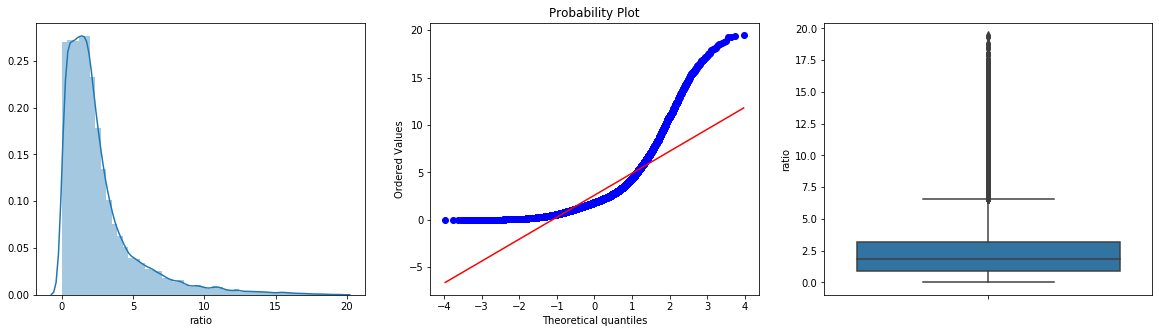

In [21]:
masterplot(data,'ratio')

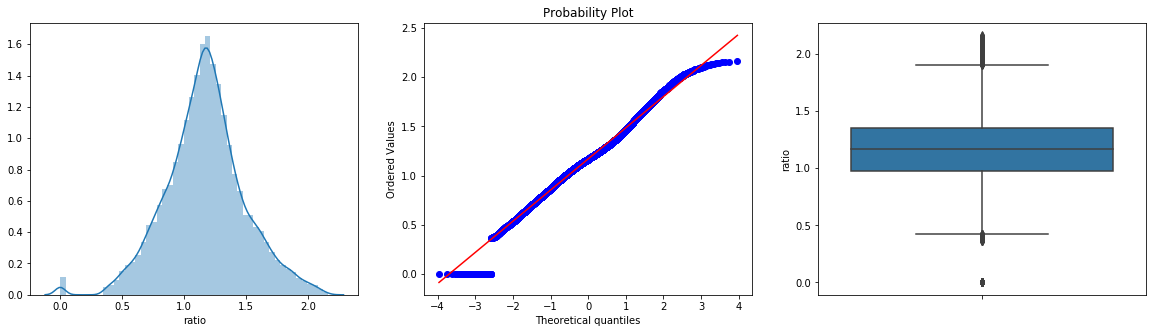

In [22]:
exponential_master(data,'ratio',0.26)

In [96]:
data['ratio'] = data['ratio']**0.26

In [97]:
data_model = data

In [56]:
data_model.groupby(['issue_year','breed_category']).count()['condition']

issue_year  breed_category
1994        2.0                  1
1995        1.0                  1
1997        1.0                  1
1998        0.0                  4
            1.0                  1
                              ... 
2018        1.0               1192
            2.0                250
2019        0.0                 65
            1.0                 90
            2.0                  9
Name: condition, Length: 61, dtype: int64

In [70]:
data_model.groupby(['issue_year','pet_category']).count()['condition'][2004]

pet_category
1    24
2    73
Name: condition, dtype: int64

In [100]:
data_model.columns

Index(['condition', 'length(m)', 'height(cm)', 'X2', 'breed_category',
       'pet_category', 'issue_month', 'issue_year', 'listing_month',
       'listing_year', 'breed_0', 'breed_1', 'breed_2', 'pet_1', 'pet_2',
       'pet_4', 'pet_0', 'Agouti', 'Apricot', 'Black', 'Black Brindle',
       'Black Smoke', 'Black Tabby', 'Black Tiger', 'Blue', 'Blue Cream',
       'Blue Merle', 'Blue Point', 'Blue Smoke', 'Blue Tabby', 'Blue Tick',
       'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle', 'Brown Tabby',
       'Brown Tiger', 'Buff', 'Calico', 'Calico Point', 'Chocolate',
       'Chocolate Point', 'Cream', 'Cream Tabby', 'Fawn', 'Flame Point',
       'Gold', 'Gray', 'Gray Tabby', 'Green', 'Lilac Point', 'Liver',
       'Liver Tick', 'Lynx Point', 'Orange', 'Orange Tabby', 'Pink', 'Red',
       'Red Merle', 'Red Tick', 'Sable', 'Seal Point', 'Silver',
       'Silver Lynx Point', 'Silver Tabby', 'Tan', 'Torbie', 'Tortie',
       'Tortie Point', 'Tricolor', 'White', 'Yellow', 'Yellow B

In [101]:
data_model.shape

(18834, 75)

In [98]:
#data_model.drop('breed_2',axis=1,inplace=True)
data_model.insert(13,'breed_2',1-(data_model['breed_0'] + data_model['breed_1']))

In [99]:
data_model.drop('X1',axis=1,inplace=True)

In [183]:
#data_breed = data_model.drop(['pet_0','pet_1','pet_2','pet_4'],axis=1)
data_pet = data_model.drop(['breed_0','breed_1'],axis=1)

In [132]:
test = pd.read_csv("C:/Users/KIIT/Downloads/pet adoption challenge/Dataset/test.csv")

In [117]:
test['issue_date'] = pd.to_datetime(test['issue_date'])

test['listing_date'] = pd.to_datetime(test['listing_date'])

test['issue_month'] = test['issue_date'].dt.month
test['issue_year'] = test['issue_date'].dt.year
test['listing_month'] = test['listing_date'].dt.month
test['listing_year'] = test['listing_date'].dt.year

In [118]:
test['ratio'] = (test['length(m)']*100)/test['height(cm)']

for i in range(len(test['color_type'])):
    #print(i)
    d = test.loc[i,'color_type']
    da = data[data['color_type'] == d]
    test.loc[i,'breed_0'] = len(da[da['breed_category'] == 0]['pet_id'])/len(da['pet_id'])
    test.loc[i,'breed_1'] = len(da[da['breed_category'] == 1]['pet_id'])/len(da['pet_id'])
    test.loc[i,'breed_2'] = len(da[da['breed_category'] == 2]['pet_id'])/len(da['pet_id'])
    test.loc[i,'pet_1'] =  len(da[da['pet_category'] == 1]['pet_id'])/len(da['pet_id'])
    test.loc[i,'pet_2'] = len(da[da['pet_category'] == 2]['pet_id'])/len(da['pet_id'])
    test.loc[i,'pet_4'] = len(da[da['pet_category'] == 4]['pet_id'])/len(da['pet_id'])
    test.loc[i,'pet_0'] = len(da[da['pet_category'] == 0]['pet_id'])/len(da['pet_id'])

In [119]:
test.drop(['pet_id','issue_date','listing_date'],axis=1,inplace=True)

test['color_type'] = test['color_type'].astype('category')
one_hot_encoded = pd.get_dummies(test['color_type'])

test = test.drop('color_type', axis=1)


test = pd.concat([test, one_hot_encoded], axis=1)
test.head()

,condition,length(m),height(cm),X1,X2,issue_month,issue_year,listing_month,listing_year,ratio,...,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
0,0.0,0.87,42.73,0,7,8,2005,9,2017,2.036040,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.06,6.71,0,1,11,2018,5,2019,0.894188,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.24,41.21,0,7,10,2012,4,2018,0.582383,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.29,8.46,7,1,2,2015,4,2018,3.427896,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.71,30.92,0,7,1,2017,4,2018,2.296248,...,0,0,0,0,0,0,0,0,0,0


In [120]:
t1 = test.dropna()

In [121]:
knn.fit(t1.drop('condition',axis=1),t1['condition'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [122]:
for i in range(len(test['X1'])):
    if(np.isnan(test.loc[i,'condition'])):
        test.loc[i,'condition'] = knn.predict(test[i:i+1].drop('condition',axis=1))[0]

In [123]:
test.head()

,condition,length(m),height(cm),X1,X2,issue_month,issue_year,listing_month,listing_year,ratio,...,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
0,0.0,0.87,42.73,0,7,8,2005,9,2017,2.036040,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.06,6.71,0,1,11,2018,5,2019,0.894188,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.24,41.21,0,7,10,2012,4,2018,0.582383,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.29,8.46,7,1,2,2015,4,2018,3.427896,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.71,30.92,0,7,1,2017,4,2018,2.296248,...,0,0,0,0,0,0,0,0,0,0


In [124]:
test['Colm1'] = (test['X1'] + test['X2'])**2

In [125]:
test.drop('ratio',axis=1,inplace=True)
test['ratio'] = test['length(m)']*100/test['height(cm)']

In [126]:
test['ratio'] = test['ratio']**0.26
test.drop('X1',axis=1,inplace=True)

In [127]:
test_breed = test.drop(['pet_0','pet_1','pet_2','pet_4'],axis=1)
test_pet = test.drop(['breed_0','breed_1'],axis=1)

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()
xgb.fit(data_breed.drop(['breed_category','pet_category'],axis=1),data_breed['breed_category'])

gb = GradientBoostingClassifier()
gb.fit(data_pet.drop(['breed_category','pet_category'],axis=1),data_pet['pet_category'])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [131]:
submit = pd.DataFrame()

In [135]:
data_breed.drop(['breed_category','pet_category'],axis=1).columns

Index(['condition', 'length(m)', 'height(cm)', 'X2', 'issue_month',
       'issue_year', 'listing_month', 'listing_year', 'breed_0', 'breed_1',
       'breed_2', 'Agouti', 'Apricot', 'Black', 'Black Brindle', 'Black Smoke',
       'Black Tabby', 'Black Tiger', 'Blue', 'Blue Cream', 'Blue Merle',
       'Blue Point', 'Blue Smoke', 'Blue Tabby', 'Blue Tick', 'Blue Tiger',
       'Brown', 'Brown Brindle', 'Brown Merle', 'Brown Tabby', 'Brown Tiger',
       'Buff', 'Calico', 'Calico Point', 'Chocolate', 'Chocolate Point',
       'Cream', 'Cream Tabby', 'Fawn', 'Flame Point', 'Gold', 'Gray',
       'Gray Tabby', 'Green', 'Lilac Point', 'Liver', 'Liver Tick',
       'Lynx Point', 'Orange', 'Orange Tabby', 'Pink', 'Red', 'Red Merle',
       'Red Tick', 'Sable', 'Seal Point', 'Silver', 'Silver Lynx Point',
       'Silver Tabby', 'Tan', 'Torbie', 'Tortie', 'Tortie Point', 'Tricolor',
       'White', 'Yellow', 'Yellow Brindle', 'Colm1', 'ratio'],
      dtype='object')

In [204]:
data_pet.drop(['breed_category','pet_category'],axis=1).columns

Index(['condition', 'length(m)', 'height(cm)', 'X2', 'issue_month',
       'issue_year', 'listing_month', 'listing_year', 'breed_2', 'pet_1',
       'pet_2', 'pet_4', 'pet_0', 'Agouti', 'Apricot', 'Black',
       'Black Brindle', 'Black Smoke', 'Black Tabby', 'Black Tiger', 'Blue',
       'Blue Cream', 'Blue Merle', 'Blue Point', 'Blue Smoke', 'Blue Tabby',
       'Blue Tick', 'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle',
       'Brown Tabby', 'Brown Tiger', 'Buff', 'Calico', 'Calico Point',
       'Chocolate', 'Chocolate Point', 'Cream', 'Cream Tabby', 'Fawn',
       'Flame Point', 'Gold', 'Gray', 'Gray Tabby', 'Green', 'Lilac Point',
       'Liver', 'Liver Tick', 'Lynx Point', 'Orange', 'Orange Tabby', 'Pink',
       'Red', 'Red Merle', 'Red Tick', 'Sable', 'Seal Point', 'Silver',
       'Silver Lynx Point', 'Silver Tabby', 'Tan', 'Torbie', 'Tortie',
       'Tortie Point', 'Tricolor', 'White', 'Yellow', 'Yellow Brindle',
       'Colm1', 'ratio'],
      dtype='object')

In [213]:
test_pet.columns

Index(['condition', 'length(m)', 'height(cm)', 'X2', 'issue_month',
       'issue_year', 'listing_month', 'listing_year', 'breed_2', 'pet_1',
       'pet_2', 'pet_4', 'pet_0', 'Agouti', 'Apricot', 'Black',
       'Black Brindle', 'Black Smoke', 'Black Tabby', 'Black Tiger', 'Blue',
       'Blue Cream', 'Blue Merle', 'Blue Point', 'Blue Smoke', 'Blue Tabby',
       'Blue Tick', 'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle',
       'Brown Tabby', 'Brown Tiger', 'Buff', 'Calico', 'Calico Point',
       'Chocolate', 'Chocolate Point', 'Cream', 'Cream Tabby', 'Fawn',
       'Flame Point', 'Gold', 'Gray', 'Gray Tabby', 'Green', 'Lilac Point',
       'Liver', 'Liver Tick', 'Lynx Point', 'Orange', 'Orange Tabby', 'Pink',
       'Red', 'Red Merle', 'Red Tick', 'Sable', 'Seal Point', 'Silver',
       'Silver Lynx Point', 'Silver Tabby', 'Tan', 'Torbie', 'Tortie',
       'Tortie Point', 'Tricolor', 'White', 'Yellow', 'Yellow Brindle',
       'Colm1', 'ratio'],
      dtype='object')

In [210]:
test_pet.drop(['Black Tiger','Brown Tiger'],axis=1,inplace=True)

In [144]:
test_breed.columns

Index(['condition', 'length(m)', 'height(cm)', 'X2', 'issue_month',
       'issue_year', 'listing_month', 'listing_year', 'breed_0', 'breed_1',
       'breed_2', 'Agouti', 'Apricot', 'Black', 'Black Brindle', 'Black Smoke',
       'Black Tabby', 'Black Tiger', 'Blue', 'Blue Cream', 'Blue Merle',
       'Blue Point', 'Blue Smoke', 'Blue Tabby', 'Blue Tick', 'Blue Tiger',
       'Brown', 'Brown Brindle', 'Brown Merle', 'Brown Tabby', 'Brown Tiger',
       'Buff', 'Calico', 'Calico Point', 'Chocolate', 'Chocolate Point',
       'Cream', 'Cream Tabby', 'Fawn', 'Flame Point', 'Gold', 'Gray',
       'Gray Tabby', 'Green', 'Lilac Point', 'Liver', 'Liver Tick',
       'Lynx Point', 'Orange', 'Orange Tabby', 'Pink', 'Red', 'Red Merle',
       'Red Tick', 'Sable', 'Seal Point', 'Silver', 'Silver Lynx Point',
       'Silver Tabby', 'Tan', 'Torbie', 'Tortie', 'Tortie Point', 'Tricolor',
       'White', 'Yellow', 'Yellow Brindle', 'Colm1', 'ratio'],
      dtype='object')

In [136]:
test_breed.insert(18,'Black_Tiger',0)

In [139]:
test_breed.drop('Black_Tiger',axis=1,inplace=True)
test_breed.insert(17,'Black Tiger',0)
test_pet.insert(18,'Black Tiger',0)

In [211]:
#test_pet.drop('Black Tiger',axis=1,inplace=True)
test_pet.insert(19,'Black Tiger',0)


In [212]:
#test_breed.insert(30,'Brown Tiger',0)
test_pet.insert(32,'Brown Tiger',0)

In [145]:
for i in range(len(test['pet_id'])):
    submit.loc[i,'pet_id'] = test.loc[i,'pet_id']
    arr = xgb.predict(test_breed[i:i+1])
    submit.loc[i,'breed_category'] = arr[0]
    ars = gb.predict(test_pet[i:i+1])
    submit.loc[i,'pet_category'] = ars[0]

In [231]:
submit[:2000]

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2.0
1,ANSL_76663,0.0,1.0
2,ANSL_58259,0.0,2.0
3,ANSL_67171,0.0,2.0
4,ANSL_72871,0.0,2.0
...,...,...,...
1995,ANSL_50717,1.0,2.0
1996,ANSL_50172,0.0,1.0
1997,ANSL_58649,1.0,1.0
1998,ANSL_52086,2.0,4.0


In [147]:
submit.to_csv("submit1.csv")

In [216]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(data_breed.drop(['breed_category','pet_category'],axis=1),data_breed['breed_category'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [217]:
for i in range(len(test['pet_id'])):
    arr = rf.predict(test_breed[i:i+1])
    submit.loc[i,'breed_category'] = arr[0]

In [218]:
submit.to_csv("submit6.csv")

In [154]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight={0:24,1:5,2:5,4:92})
rfc.fit(data_pet.drop(['breed_category','pet_category'],axis=1),data_pet['pet_category'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 24, 1: 5, 2: 5, 4: 92},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [155]:
for i in range(len(test['pet_id'])):
    arr = rfc.predict(test_pet[i:i+1])
    submit.loc[i,'pet_category'] = arr[0]

In [156]:
submit.to_csv("submit3.csv")

In [158]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(data_breed.drop(['breed_category','pet_category'],axis=1),data_breed['breed_category'])

ad = AdaBoostClassifier()
ad.fit(data_pet.drop(['breed_category','pet_category'],axis=1),data_pet['pet_category'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [159]:
for i in range(len(test['pet_id'])):
    submit.loc[i,'pet_id'] = test.loc[i,'pet_id']
    arr = ada.predict(test_breed[i:i+1])
    submit.loc[i,'breed_category'] = arr[0]
    ars = ad.predict(test_pet[i:i+1])
    submit.loc[i,'pet_category'] = ars[0]

In [160]:
submit.to_csv("submit4.csv")

In [162]:
from imblearn.over_sampling import SMOTE

In [163]:
sm = SMOTE(random_state=12)

In [165]:
X_train = data_pet.drop(['breed_category','pet_category'],axis=1)
Y_train = data_pet['pet_category']

In [184]:
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

AttributeError: 'SMOTE' object has no attribute '_validate_data'

In [167]:
from sklearn.utils import resample

In [168]:
data_pet.groupby('pet_category').count()['condition']

pet_category
0       88
1     7184
2    10621
4      941
Name: condition, dtype: int64

In [174]:
minority_upsampled = resample(data_pet, 
                                 replace=True,     
                                 n_samples=9000,    
                                 random_state=12) 

In [175]:
minority_upsampled.groupby('pet_category').count()['condition']

pet_category
0      41
1    3498
2    5013
4     448
Name: condition, dtype: int64

In [171]:
test_pet.shape

(8072, 71)

In [185]:
data_pet.shape

(18834, 73)

In [186]:
data_pet_minor = data_pet[data_pet['pet_category'] != 2]

In [187]:
data_pet_minor = data_pet_minor[data_pet_minor['pet_category'] != 1]

In [188]:
data_pet_minor.groupby('pet_category').count()['condition']

pet_category
0     88
4    941
Name: condition, dtype: int64

In [189]:
data_pet_major = data_pet[data_pet['pet_category'] != 4]

In [190]:
data_pet_major = data_pet_major[data_pet_major['pet_category'] != 0]

In [191]:
data_pet_major.groupby('pet_category').count()['condition']

pet_category
1     7184
2    10621
Name: condition, dtype: int64

In [192]:
data_pet_major.head()

,condition,length(m),height(cm),X2,breed_category,pet_category,issue_month,issue_year,listing_month,listing_year,...,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle,Colm1,ratio
0,2.0,0.80,7.78,9,0.0,1,7,2016,9,2016,...,0,0,0,0,0,0,0,0,484,1.832942
1,1.0,0.72,14.19,9,0.0,2,11,2013,12,2018,...,0,0,0,0,0,1,0,0,484,1.525426
3,1.0,0.62,17.82,1,0.0,2,12,2016,1,2019,...,0,0,0,0,0,1,0,0,1,1.382884
4,2.0,0.50,11.06,4,0.0,1,9,2017,11,2017,...,0,0,0,0,0,0,0,0,484,1.480321
5,0.0,0.92,29.56,7,1.0,2,10,2017,3,2019,...,0,0,0,0,0,0,0,0,49,1.343389


In [194]:
pd.concat([data_pet_major[:2000],data_pet_minor])

,condition,length(m),height(cm),X2,breed_category,pet_category,issue_month,issue_year,listing_month,listing_year,...,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle,Colm1,ratio
0,2.0,0.80,7.78,9,0.0,1,7,2016,9,2016,...,0,0,0,0,0,0,0,0,484,1.832942
1,1.0,0.72,14.19,9,0.0,2,11,2013,12,2018,...,0,0,0,0,0,1,0,0,484,1.525426
3,1.0,0.62,17.82,1,0.0,2,12,2016,1,2019,...,0,0,0,0,0,1,0,0,1,1.382884
4,2.0,0.50,11.06,4,0.0,1,9,2017,11,2017,...,0,0,0,0,0,0,0,0,484,1.480321
5,0.0,0.92,29.56,7,1.0,2,10,2017,3,2019,...,0,0,0,0,0,0,0,0,49,1.343389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18741,0.0,0.27,19.47,4,2.0,4,5,2016,6,2018,...,0,0,0,0,0,0,0,0,361,1.088728
18759,2.0,0.81,26.32,4,2.0,4,2,2018,3,2019,...,0,0,0,0,0,0,0,0,361,1.339466
18771,2.0,0.11,47.40,4,0.0,4,7,2015,7,2016,...,0,0,0,0,0,0,0,0,361,0.684006
18812,1.0,0.58,40.07,4,2.0,4,10,2014,11,2016,...,0,0,0,0,0,0,0,0,361,1.100926


In [200]:
from xgboost import XGBClassifier

In [201]:
xgb1 = XGBClassifier()
xgb1.fit(data_breed.drop(['breed_category','pet_category'],axis=1),data_breed['breed_category'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [202]:
xgb2 = XGBClassifier()
xgb2.fit(data_pet.drop(['breed_category','pet_category'],axis=1),data_pet['pet_category'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [214]:
for i in range(len(test['pet_id'])):
    #submit.loc[i,'pet_id'] = test.loc[i,'pet_id']
    arr = xgb1.predict(test_breed[i:i+1])
    submit.loc[i,'breed_category'] = arr[0]
    ars = xgb2.predict(test_pet[i:i+1])
    submit.loc[i,'pet_category'] = ars[0]

In [215]:
submit.to_csv("submit5.csv")

In [195]:
from sklearn.model_selection import StratifiedKFold

In [229]:
from sklearn.ensemble import BaggingClassifier

In [270]:
model1 = XGBClassifier()
model2 = GradientBoostingClassifier()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier()


In [271]:
model5 = XGBClassifier()
model6 = GradientBoostingClassifier()
model7 = RandomForestClassifier()
model8 = GradientBoostingClassifier()


In [272]:
model9 = XGBClassifier()
model10 = GradientBoostingClassifier()

In [273]:
j = 0

df = pd.concat([data_pet_major[j:j+1800],data_pet_minor])
model1.fit(df.drop(['breed_category','pet_category'],axis=1),df['pet_category'])
j = j+1800

df = pd.concat([data_pet_major[j:j+1800],data_pet_minor])
model2.fit(df.drop(['breed_category','pet_category'],axis=1),df['pet_category'])
j = j+1800

df = pd.concat([data_pet_major[j:j+1800],data_pet_minor])
model3.fit(df.drop(['breed_category','pet_category'],axis=1),df['pet_category'])
j = j+1800

df = pd.concat([data_pet_major[j:j+1800],data_pet_minor])
model4.fit(df.drop(['breed_category','pet_category'],axis=1),df['pet_category'])
j = j+1800

df = pd.concat([data_pet_major[j:j+1800],data_pet_minor])
model5.fit(df.drop(['breed_category','pet_category'],axis=1),df['pet_category'])
j = j+1800

df = pd.concat([data_pet_major[j:j+1800],data_pet_minor])
model6.fit(df.drop(['breed_category','pet_category'],axis=1),df['pet_category'])
j = j+1800

df = pd.concat([data_pet_major[j:j+1800],data_pet_minor])
model7.fit(df.drop(['breed_category','pet_category'],axis=1),df['pet_category'])
j = j+1800

df = pd.concat([data_pet_major[j:j+1800],data_pet_minor])
model8.fit(df.drop(['breed_category','pet_category'],axis=1),df['pet_category'])
j = j+1800

df = pd.concat([data_pet_major[j:j+1800],data_pet_minor])
model9.fit(df.drop(['breed_category','pet_category'],axis=1),df['pet_category'])
j = j+1800

df = pd.concat([data_pet_major[j:j+1800],data_pet_minor])
model10.fit(df.drop(['breed_category','pet_category'],axis=1),df['pet_category'])
j = j+1800


In [274]:
model4

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [261]:
def getmode(inplist):
    '''with list of items as input, returns mode
    '''
    dictofcounts = {}
    listofcounts = []
    for i in inplist:
        countofi = inplist.count(i) # count items for each item in list
        listofcounts.append(countofi) # add counts to list
        dictofcounts[i]=countofi # add counts and item in dict to get later
    maxcount = max(listofcounts) # get max count of items
    if maxcount ==1:
        return 0 ;
    else :
        modelist = [] # if more than one mode, add to list to print out
        for key, item in dictofcounts.items():
            if item ==maxcount: # get item from original list with most counts
                modelist.append(str(key))
        return modelist 

In [276]:
for i in range(len(test['pet_id'])):
    ars = [model1.predict(test_pet[i:i+1])[0],model2.predict(test_pet[i:i+1])[0],model3.predict(test_pet[i:i+1])[0],model4.predict(test_pet[i:i+1])[0],model5.predict(test_pet[i:i+1])[0],model6.predict(test_pet[i:i+1])[0],model7.predict(test_pet[i:i+1])[0],model8.predict(test_pet[i:i+1])[0],model9.predict(test_pet[i:i+1])[0],model10.predict(test_pet[i:i+1])[0]]
    submit.loc[i,'pet_category'] = max(getmode(ars))

In [277]:
submit.to_csv("submit7.csv")